In [ ]:
import requests
import bs4
from bs4 import BeautifulSoup
import html5lib
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import spacy
import string
import wordcloud
from wordcloud import WordCloud,STOPWORDS

## Webscraping to get data from flipkart for a motorola mobile

In [ ]:
url='https://www.flipkart.com/motorola-g32-mineral-gray-64-gb/product-reviews/itmdcfa4c4022714?pid=MOBGEA3CZ8Z7HWCY&lid=LSTMOBGEA3CZ8Z7HWCYPHBSGA&marketplace=FLIPKART&page='


In [ ]:
array = []

for page in range(2,257,1):
    r= requests.get(url+str(page))
    soup = BeautifulSoup(r.content,'html.parser')
    text=soup.find('div',class_='_1YokD2 _3Mn1Gg col-9-12')
    let1=text.get_text()

    array.append(let1)

In [ ]:
len(array)

255

In [ ]:
url_1='https://www.flipkart.com/motorola-g32-mineral-gray-64-gb/product-reviews/itmdcfa4c4022714?pid=MOBGEA3CZ8Z7HWCY&lid=LSTMOBGEA3CZ8Z7HWCYPHBSGA&marketplace=FLIPKART'

In [ ]:
r1= requests.get(url_1)
soup1= BeautifulSoup(r1.content,'html.parser')
text1= soup1.find('div',class_='_1YokD2 _3Mn1Gg col-9-12')
let=text1.get_text()
array.append(let)

## Applying Basic text processing such as removing Emojis, URL,Striping,Tokenization

In [ ]:
# Function to remove Url
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [ ]:
# Tokenization
wo_emoji=[]
sentences = tokenize.sent_tokenize(" ".join(array))
for i in sentences:
    wo_emoji.append(remove_emoji(i))
    

In [ ]:
# Function to remove Emojis
def remove_URL(sample):
     return re.sub(r"http\S+", "", sample)
no_url=[]
for i in wo_emoji:
    no_url.append(remove_URL(i))


In [ ]:

data_final=[]
for v in no_url:
    g=v.strip()
    data_final.append(g)
    

In [ ]:
df=pd.DataFrame(data_final,columns=['Reviews'])
pd.set_option('display.max_colwidth', None)
df

,Reviews
0,"MOTOROLA G32 (Mineral Gray, 64 GB) ReviewsMost HelpfulMost RecentPositive FirstNegative FirstOverallCameraBatteryDisplayDesignPerformance4.226,151 Ratings &2,565 Reviews5432114,7436,7342,0527161,9064WonderfulAwesome and best mobile in this price range .sound system of Dolby Atmos gives streo sound and good listening experience .also clean ui of this phone offers best experience .some features are lacks such as AppLock ,show data speed etc.But overall this is the best phone in this price range .READ MORENavin SinghCertified Buyer, Arrah3 months ago355PermalinkReport Abuse5Highly recommendedBest smartphone super build quality."
1,"Snapdragon 680 processor 2.4 Ghz...90 hz full hd 6.5 display, Stereo speakers are good performance."
2,"Awesome battery backup... 33w fast charging... better camera quality... and gestures are superb.... side mount finger print sensor....etc.READ MOREVAISAKH TKCertified Buyer, Nanmanda4 months ago4814PermalinkReport Abuse5Just wow!Now this is a mind blowing superb and vert attractive good looking phone."
3,"Performance is Good, Camera is good comparing other motorola phones."
4,"Go for it you will Love it..READ MORERohit KumarCertified Buyer, Gurugram2 months ago421PermalinkReport Abuse5Classy productDon't be doubtful...this is a great device(Moto G32)."
...,...
605,Very first.
606,Especially Motorola G32 stork android very good performance every day use.
607,I really like moto phone.
608,I recommend to buy Moto smartphones.


In [ ]:
afinn= pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')

In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [ ]:
# Function for calculating Affin score
sentiment_lexicon = affinity_scores
nlp = spacy.load('en_core_web_sm')
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [ ]:
df['sentiment_value'] = df['Reviews'].apply(calculate_sentiment) 

In [ ]:
# Word count of each review
df['word_count'] = df['Reviews'].str.split().apply(len)
df['word_count'].head(10) 

0    76
1    15
2    38
3    10
4    22
5    15
6    15
7     7
8     9
9     3
Name: word_count, dtype: int64

In [ ]:
df['sentiment_value'].describe()

count    610.000000
mean       6.591803
std       10.889153
min       -7.000000
25%        0.000000
50%        3.000000
75%        8.000000
max       95.000000
Name: sentiment_value, dtype: float64

In [ ]:
df

,Reviews,sentiment_value,word_count
0,"MOTOROLA G32 (Mineral Gray, 64 GB) ReviewsMost HelpfulMost RecentPositive FirstNegative FirstOverallCameraBatteryDisplayDesignPerformance4.226,151 Ratings &2,565 Reviews5432114,7436,7342,0527161,9064WonderfulAwesome and best mobile in this price range .sound system of Dolby Atmos gives streo sound and good listening experience .also clean ui of this phone offers best experience .some features are lacks such as AppLock ,show data speed etc.But overall this is the best phone in this price range .READ MORENavin SinghCertified Buyer, Arrah3 months ago355PermalinkReport Abuse5Highly recommendedBest smartphone super build quality.",15,76
1,"Snapdragon 680 processor 2.4 Ghz...90 hz full hd 6.5 display, Stereo speakers are good performance.",3,15
2,"Awesome battery backup... 33w fast charging... better camera quality... and gestures are superb.... side mount finger print sensor....etc.READ MOREVAISAKH TKCertified Buyer, Nanmanda4 months ago4814PermalinkReport Abuse5Just wow!Now this is a mind blowing superb and vert attractive good looking phone.",17,38
3,"Performance is Good, Camera is good comparing other motorola phones.",6,10
4,"Go for it you will Love it..READ MORERohit KumarCertified Buyer, Gurugram2 months ago421PermalinkReport Abuse5Classy productDon't be doubtful...this is a great device(Moto G32).",5,22
...,...,...,...
605,Very first.,0,2
606,Especially Motorola G32 stork android very good performance every day use.,3,11
607,I really like moto phone.,2,5
608,I recommend to buy Moto smartphones.,2,6


## Representation of Sentiment Value

C:\Users\yashd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

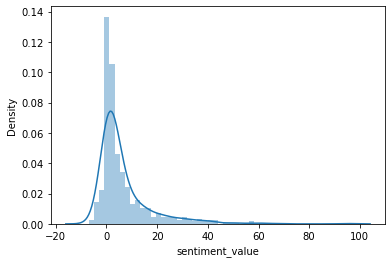

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['sentiment_value']) 

<AxesSubplot:ylabel='sentiment_value'>

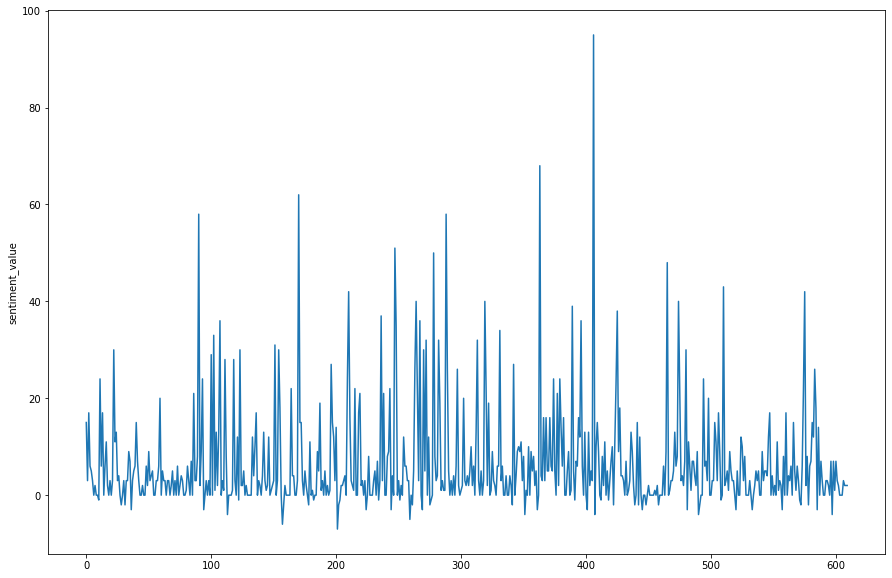

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x=df.index,data=df) 